# Simple 1D statistical analysis - using the Jura data

The purpose of this exercise is to get acquainted with simple methods for working with, and sampling
from, 1D (both parametric and non-parametric) probability distributions.

In the following $f(x)$ is a 1D probability density and $F(x)$ the corresponding 1D cumulative probability
density function. $F^{−1}(x)$ is the inverse cumulative probability density function.

You need function to compute the probability density function value ([scipy.stats.norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)), the cumulative distribution function ([scipy.stats.norm.cdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)) and inverse cumulative distribution ([scipy.stats.norm.ppf](scipy.stats.norm.ppf)) for a 1D normal distribution.


In [4]:
import matplotlib.pyplot  as plt
import numpy              as np
import scipy 

import eas


## Working with 1D data: The Jura data set
The Jura data set contains 259 observations of different properties (such as location, rock type, and different concentrations of chemical substances).  It can be loaded using 


In [5]:
# Read data
DATA     = eas.read(filename='prediction.dat')
d       = DATA['D']
h       = DATA['header']

# Amount of parameters
N       = d.shape[1]

In [6]:
# f^1
F1_10 = scipy.interpolate.interp1d(x,F1)(10)
F1_8 = scipy.interpolate.interp1d(x,F1)(8)
print(' P1[ 8<x<10 ] =  F1(10)- F1(8) = % 3.2f' % (F1_10-F1_8))

# f^2
F2_10 = scipy.interpolate.interp1d(x,F2)(10)
F2_8 = scipy.interpolate.interp1d(x,F2)(8)
print(' P2[ 8<x<10 ] =  F2(10)- F2(8) = % 3.2f' % (F2_10-F2_8))

# f^*
F12_10 = scipy.interpolate.interp1d(x,F12)(10)
F12_8 = scipy.interpolate.interp1d(x,F12)(8)
print('P12[ 8<x<10 ] = F12(10)-F12(8) = % 3.2f' % (F12_10-F12_8))


NameError: name 'x' is not defined

### Ex1: Compute the mean, standard deviation, and variance, for all the observed parameters in the Jura data set.

In [7]:
# Mean and variances of each parameter
m0      = np.mean(d,axis=0)
v0      = np.var(d,axis=0)
s0      = np.std(d,axis=0)

### Ex2: Plot the apparent a) probability density distribution, $f_X$, and b) cumulative probability distribution, $F_X$, for all the parameters in the Jura data sets. 

Which of the parameters, if any, appear normally distribute?.?

In [8]:

# Amount of histogram bins
N_hist = 20

# Pre-allocate vectors
d_pdfs          = np.zeros((N,N_hist))
d_cpdfs         = np.zeros((N,N_hist))
d_pdf_gaussians = np.zeros((N,N_hist+1))
d_cpdf_gaussians= np.zeros((N,N_hist+1))
hxs             = np.zeros((N,N_hist+1))
dxs             = np.zeros(N)

for i in range(N):
    [c,hx]  = np.histogram(d[:,i],N_hist)
    hxs[i,:]= hx
    nC      = np.sum(c)
    
    dx      = hx[1] - hx[0]
    dxs[i]  = dx
    
    d_pdf       = c/sum(c*dx)
    d_pdfs[i,:] = d_pdf
    
    d_cpdf      = np.cumsum(c)/nC
    d_cpdfs[i,:]= d_cpdf
    
    d_pdf_gaussian      = sp.stats.norm.pdf(hx,m0[i],np.sqrt(v0[i]))
    d_pdf_gaussian      = d_pdf_gaussian*(np.sum(d_pdf)/np.sum(d_pdf_gaussian))
    d_pdf_gaussians[i,:]= d_pdf_gaussian
    
    d_cpdf_gaussian = sp.stats.norm.cdf(hx,m0[i],np.sqrt(v0[i]))
    d_cpdf_gaussians[i,:] = d_cpdf_gaussian


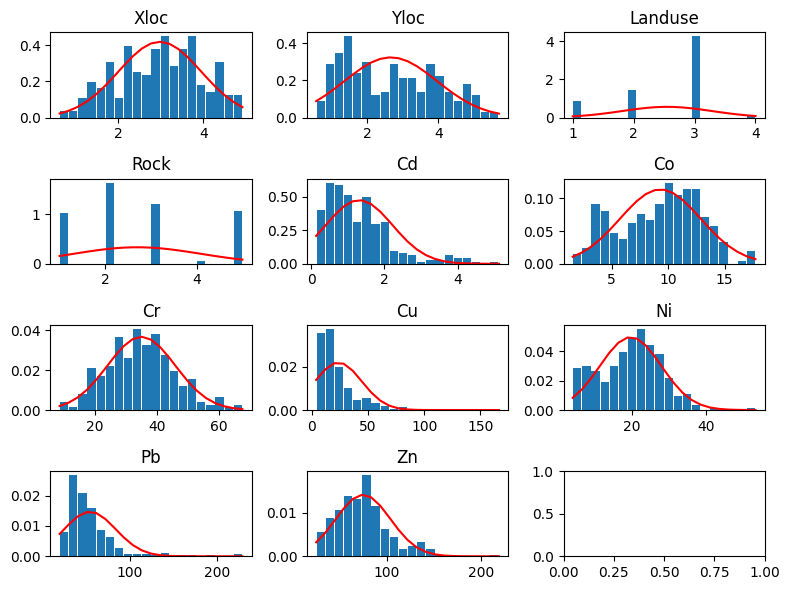

In [9]:
## FIGURE:  PDF
fig_pdf, axs = plt.subplots(4,3, figsize=(8, 6), facecolor='w', edgecolor='k')
fig_pdf.subplots_adjust(hspace = .5, wspace=.25)
axs = axs.ravel()
for i in range(N):
    x = ((hxs[i][1:] + hxs[i][:-1])/2)
    axs[i].bar(x,d_pdfs[i,:],0.9*dxs[i])
    axs[i].plot(hxs[i],d_pdf_gaussians[i,:],'r')    
    axs[i].set_title(h[i])
fig_pdf.tight_layout()

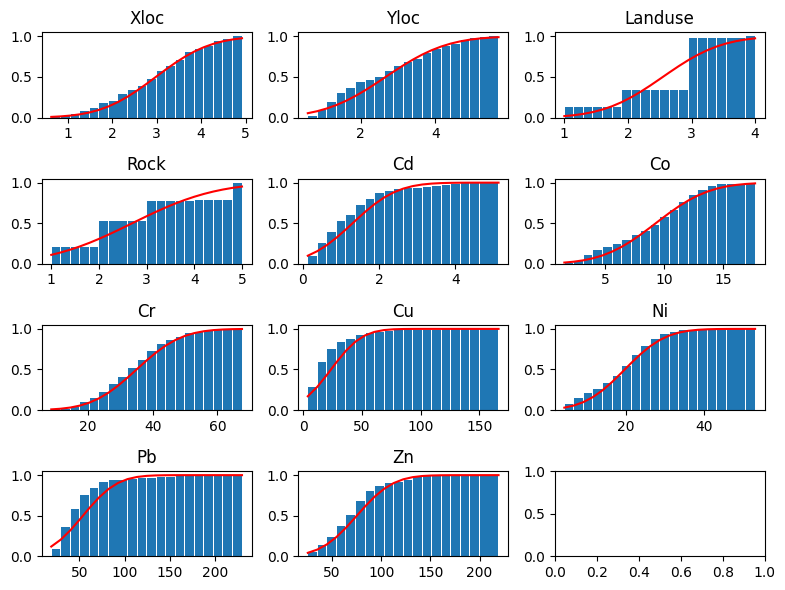

In [10]:
## FIGURE:  CPDF   
fig_cpdf, axs = plt.subplots(4,3, figsize=(8, 6), facecolor='w', edgecolor='k')
fig_cpdf.subplots_adjust(hspace = .5, wspace=.25)
axs = axs.ravel()
for i in range(N):
    x = ((hxs[i][1:] + hxs[i][:-1])/2)
    axs[i].bar(x,d_cpdfs[i,:],0.9*dxs[i])
    axs[i].plot(hxs[i],d_cpdf_gaussians[i,:],'r')    
    axs[i].set_title(h[i])
fig_cpdf.tight_layout()

### Ex3: Compute the 95\% confidence intervals [$F_X^{-1}(.025),F_X^{-1}(.975)$] for all parameters assuming the properties of the Gaussian distribution found in Ex2.

In [11]:

# Amount of histogram bins
N_hist = 25

# Amount of datapoints
N_data = d.shape[0]

for i in range(N):
    [c,hx]  = np.histogram(d[:,i],N_hist)
    nC      = np.sum(c)
    
    dx      = hx[1] - hx[0]
    
    i0025   = np.ceil(0.025*N_data).astype(int)
    i0975   = np.ceil(0.975*N_data).astype(int)
    
    sd      = np.sort(d[:,i]);
    
    d_pdf   = c/np.sum(c*dx) 
    d_cpdf  = np.cumsum(c)/nC
    
    print('[-- %s]'%h[i])
    
    print('%s true,  95%% conf interval [ %5.3f , %5.3f ]'%(h[i],sd[i0025],sd[i0975]))
    m = np.mean(d[:,i])
    s = np.std(d[:,i])    
    print('%s gaus,  95%% conf interval [ %5.3f , %5.3f]\n'%(h[i],sp.stats.norm.ppf(0.025,m,s),sp.stats.norm.ppf(0.975,m,s)))


[-- Xloc]
Xloc true,  95% conf interval [ 1.114 , 4.745 ]
Xloc gaus,  95% conf interval [ 1.073 , 4.887]

[-- Yloc]
Yloc true,  95% conf interval [ 0.897 , 5.124 ]
Yloc gaus,  95% conf interval [ 0.131 , 5.199]

[-- Landuse]
Landuse true,  95% conf interval [ 1.000 , 3.000 ]
Landuse gaus,  95% conf interval [ 1.107 , 3.990]

[-- Rock]
Rock true,  95% conf interval [ 1.000 , 5.000 ]
Rock gaus,  95% conf interval [ -0.015 , 5.413]

[-- Cd]
Cd true,  95% conf interval [ 0.240 , 4.020 ]
Cd gaus,  95% conf interval [ -0.481 , 3.099]

[-- Co]
Co true,  95% conf interval [ 3.140 , 15.280 ]
Co gaus,  95% conf interval [ 2.307 , 16.298]

[-- Cr]
Cr true,  95% conf interval [ 16.240 , 60.800 ]
Cr gaus,  95% conf interval [ 13.635 , 56.505]

[-- Cu]
Cu true,  95% conf interval [ 5.360 , 79.200 ]
Cu gaus,  95% conf interval [ -16.790 , 64.245]

[-- Ni]
Ni true,  95% conf interval [ 5.200 , 35.120 ]
Ni gaus,  95% conf interval [ 3.625 , 35.835]

[-- Pb]
Pb true,  95% conf interval [ 24.640 , 146.80